In [1]:
import pymks
import numpy as np
from PIL import Image
from Scripts import SpatialCorrelations as corr
import matplotlib.pyplot as plt
import pandas as pd
import os
from Scripts import velocityCalculations as vel


/home/sushil/anaconda3/envs/env_adi/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/sushil/anaconda3/envs/env_adi/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
path = '/home/sushil/Desktop/CH/output/'
list_of_files = os.listdir(path)
list_of_files.sort()
list_files = []
for i in list_of_files:
    if i[-5:]=='0.dat':
        list_files.append(path+i)


In [3]:
list_files

['/home/sushil/Desktop/CH/output/time_000100.dat',
 '/home/sushil/Desktop/CH/output/time_000200.dat',
 '/home/sushil/Desktop/CH/output/time_000300.dat',
 '/home/sushil/Desktop/CH/output/time_000400.dat',
 '/home/sushil/Desktop/CH/output/time_000500.dat',
 '/home/sushil/Desktop/CH/output/time_000600.dat',
 '/home/sushil/Desktop/CH/output/time_000700.dat',
 '/home/sushil/Desktop/CH/output/time_000800.dat',
 '/home/sushil/Desktop/CH/output/time_000900.dat',
 '/home/sushil/Desktop/CH/output/time_001000.dat',
 '/home/sushil/Desktop/CH/output/time_001100.dat',
 '/home/sushil/Desktop/CH/output/time_001200.dat',
 '/home/sushil/Desktop/CH/output/time_001300.dat',
 '/home/sushil/Desktop/CH/output/time_001400.dat',
 '/home/sushil/Desktop/CH/output/time_001500.dat',
 '/home/sushil/Desktop/CH/output/time_001600.dat',
 '/home/sushil/Desktop/CH/output/time_001700.dat',
 '/home/sushil/Desktop/CH/output/time_001800.dat',
 '/home/sushil/Desktop/CH/output/time_001900.dat',
 '/home/sushil/Desktop/CH/outpu

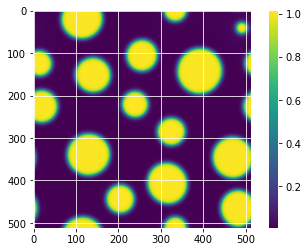

78643.196638777


In [8]:
img_ = corr.dat_to_numpy(list_files[100])
plt.imshow(img_)
plt.colorbar()
plt.show()
print(np.sum(img_))

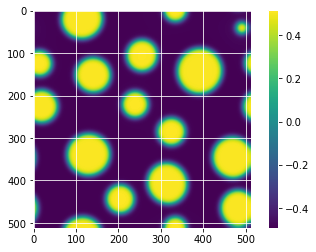

In [9]:
plt.imshow(vel.image_preprocessing(img_))
plt.colorbar()

In [10]:
velocity_mag = vel.velocityMagnitude(list_files, 390, 2)

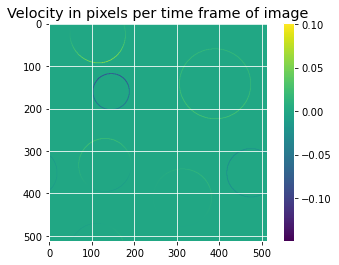

In [11]:

a = (velocity_mag)
where_are_NaNs = np.isnan(a)
a[where_are_NaNs] = 0
plt.title('Velocity in pixels per time frame of image')
plt.rcParams["figure.figsize"] = (20,20)
plt.imshow(a)
plt.colorbar()


In [12]:
listy =(a.flatten().tolist())
A =[]
for i in listy:
    if i!=0:
        A.append(i)
   
A.sort()
len(A)

2995

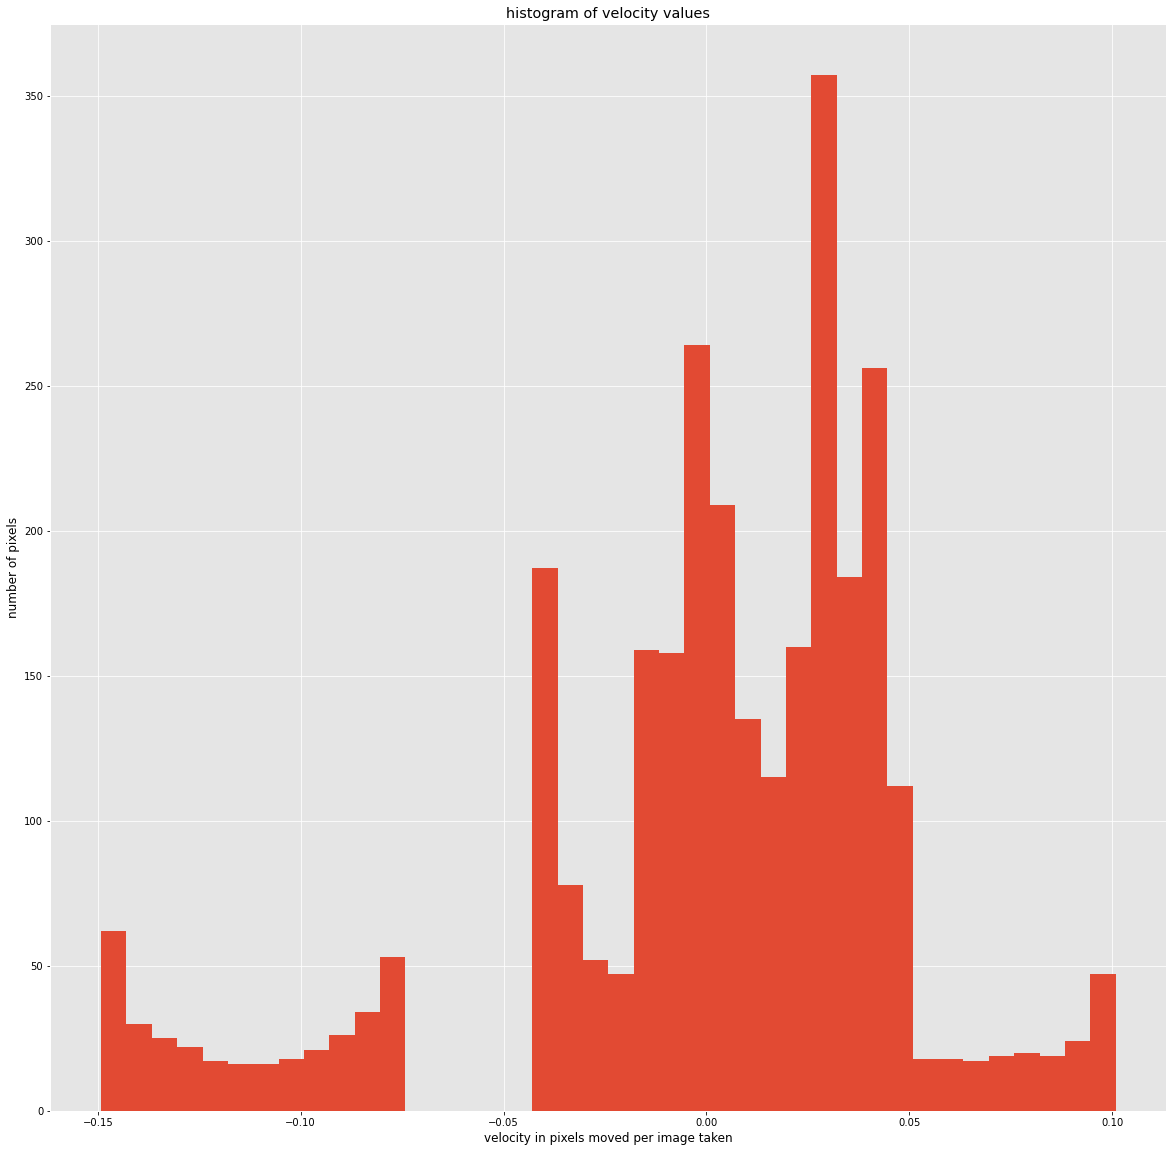

In [16]:
x =plt.hist(A,bins = 40) 
plt.title("histogram of velocity values") 
plt.xlabel('velocity in pixels moved per image taken')
plt.ylabel('number of pixels')
plt.show()

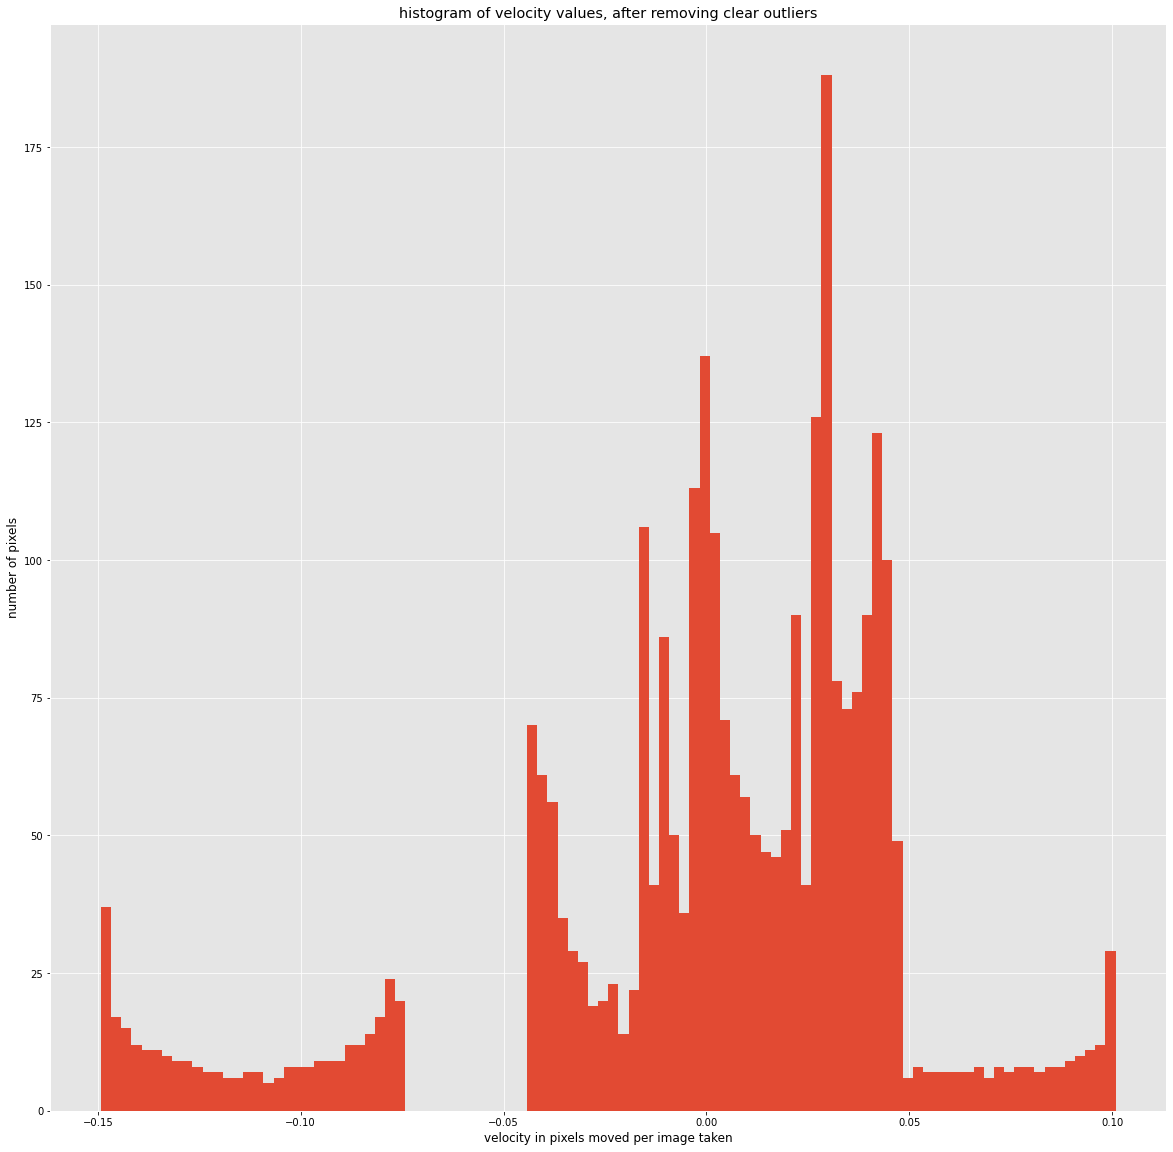

In [17]:

x =plt.hist(A, bins = 100) 
plt.title("histogram of velocity values, after removing clear outliers") 
plt.xlabel('velocity in pixels moved per image taken')
plt.ylabel('number of pixels')
plt.show()

In [18]:
velocity_direction = vel.velocityDirection(list_files, 200, 2)


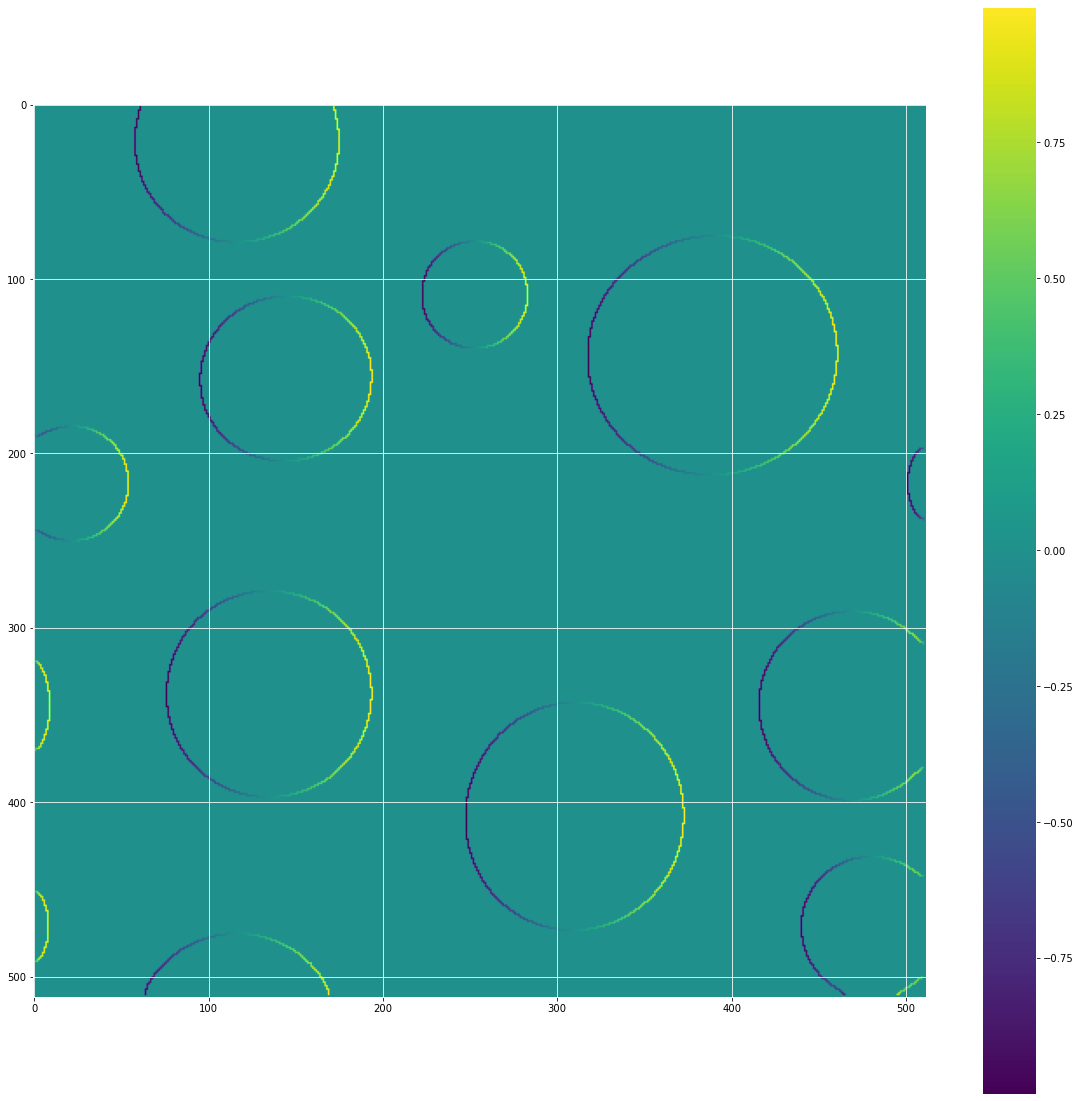

In [19]:
where_are_NaNs = np.isnan(velocity_direction[1])
velocity_direction[1][where_are_NaNs] = 0

where_are_NaNs = np.isnan(velocity_direction[0])
velocity_direction[0][where_are_NaNs] = 0

plt.imshow(velocity_direction[1])

plt.colorbar()

In [20]:
x = np.zeros((64,64))
y = np.zeros((64,64))
             
for i in range(0,64):
    for j in range(0,64):
        if np.max(velocity_direction[0][i*8:(i+1)*8,j*8:(j+1)*8])==0.0:
            x[i][j] = np.min(velocity_direction[0][i*8:(i+1)*8,j*8:(j+1)*8])
        else:
            x[i][j] = np.max(velocity_direction[0][i*8:(i+1)*8,j*8:(j+1)*8])
        if np.max(velocity_direction[1][i*8:(i+1)*8,j*8:(j+1)*8])==0.0:
            y[i][j] = np.min(velocity_direction[1][i*8:(i+1)*8,j*8:(j+1)*8])
        else:
            y[i][j] = np.max(velocity_direction[1][i*8:(i+1)*8,j*8:(j+1)*8])
        
        

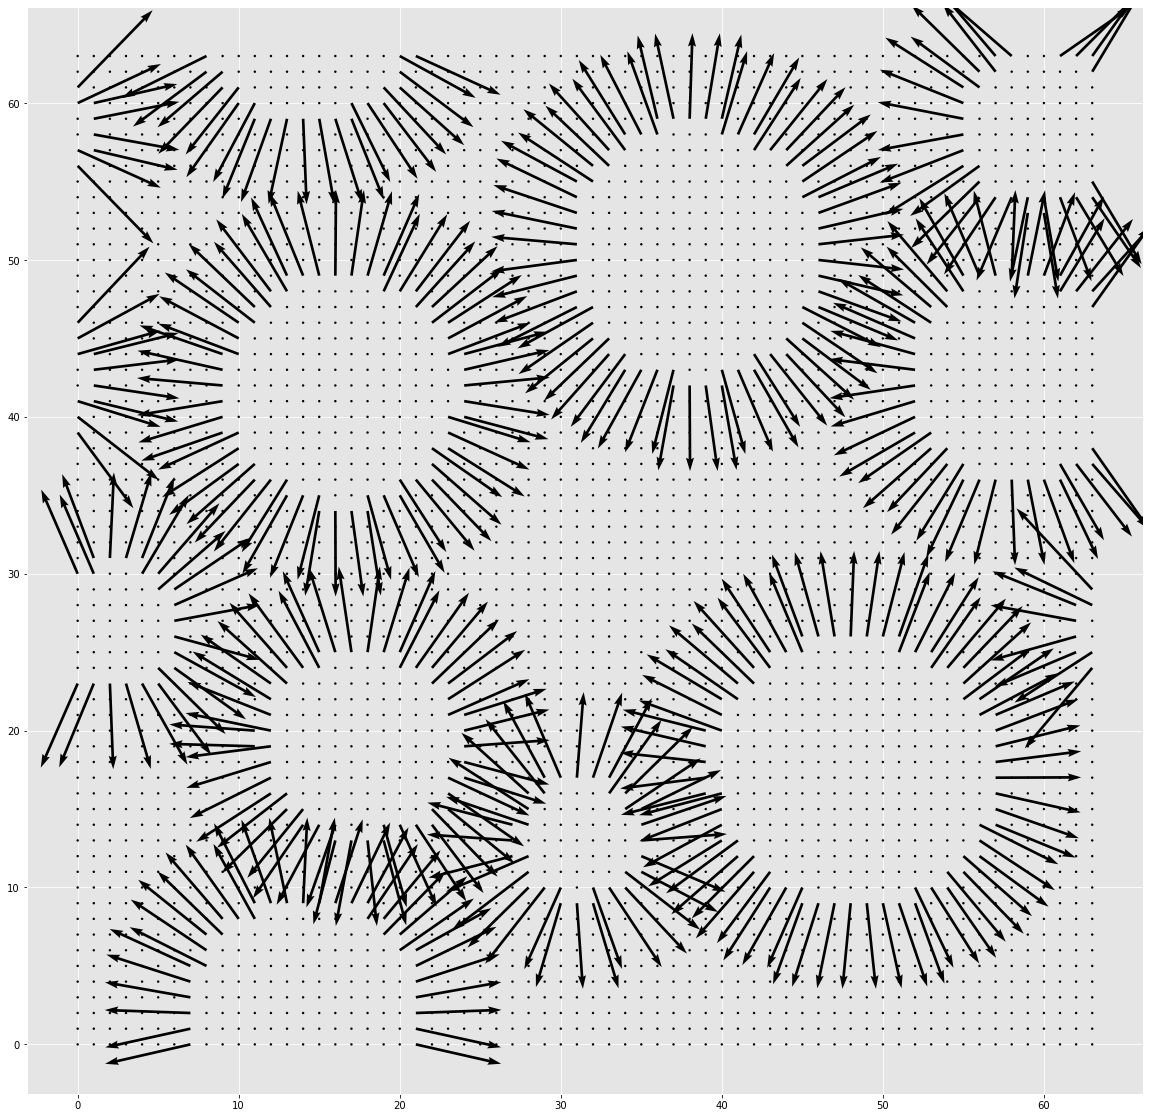

In [21]:
Fx = y
Fy = x
x_ = np.arange(0,64)
y_ = np.arange(0,64)

M = np.sqrt(x*x+y*y)
X, Y = np.meshgrid(x_,y_)
qq =plt.quiver(X, Y, Fx, Fy,)

plt.show()


In [15]:
a = ((velocity_mag))

velocity_value_x = a*velocity_direction[0]
velocity_value_y = a*velocity_direction[1]

In [16]:
x = np.zeros((64,64))
y = np.zeros((64,64))
             
for i in range(0,64):
    for j in range(0,64):
        if np.max(velocity_value_x[i*8:(i+1)*8,j*8:(j+1)*8])==0.0:
            x[i][j] = np.min(velocity_value_x[i*8:(i+1)*8,j*8:(j+1)*8])
        else:
            x[i][j] = np.max(velocity_value_x[i*8:(i+1)*8,j*8:(j+1)*8])
        if np.max(velocity_value_y[i*8:(i+1)*8,j*8:(j+1)*8])==0.0:
            y[i][j] = np.min(velocity_value_y[i*8:(i+1)*8,j*8:(j+1)*8])
        else:
            y[i][j] = np.max(velocity_value_y[i*8:(i+1)*8,j*8:(j+1)*8])

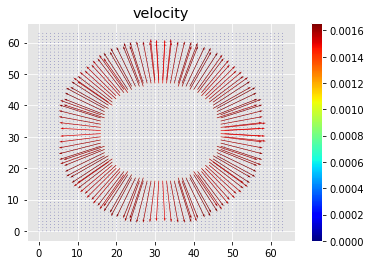

In [17]:
Fx = y
Fy = x
x_ = np.arange(0,64)
y_ = np.arange(0,64)

M = np.sqrt(x*x+y*y)
X, Y = np.meshgrid(x_,y_)

#plt.axes([0.065, 0.065, 0.9, 0.9])
plt.quiver(X, Y, Fx, Fy,M,scale = 0.01,cmap=plt.cm.jet)
plt.colorbar()
plt.title('velocity')
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

In [18]:
np.max(M)

0.0016539096751663925